In [1]:
import gensim
import pandas as pd
from config import *
from tools import *
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
TARGET = 'industry'

In [4]:
tr_clk_list_df = pd.read_pickle(TRAIN_DIR+CLK_PATH_DICT[TARGET])
ts_clk_list_df = pd.read_pickle(TEST_DIR+CLK_PATH_DICT[TARGET])

In [5]:
grid_df = pd.concat([tr_clk_list_df, ts_clk_list_df], axis=0)
del tr_clk_list_df, ts_clk_list_df

In [6]:
grid_df[TARGET] = grid_df[TARGET].map(lambda x: list(map(str, x)))

In [7]:
sentences = grid_df[TARGET].values.tolist()

In [8]:
class loss(object):
    def __init__(self):
        self.loss_list = []

In [13]:
### Gensim callback
#####################################
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss = loss()

    def on_epoch_end(self, model):
        clear_output(wait=True)
        loss = model.get_latest_training_loss()
        
        self.loss.loss_list.append(loss)
        ### show loss
        if len(self.loss.loss_list) > 1:
            tmp = np.array(self.loss.loss_list)
            plt.plot(tmp[1:]-tmp[:-1])
            plt.show()
            
        print('loss list: ', self.loss.loss_list)
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        model.save('/home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_%s.txt'%TARGET)
        self.epoch += 1

In [14]:
N_CORES = os.cpu_count()
print(N_CORES)

72


In [17]:
### Gensim Parameter
######################################
params = {'sentences': sentences,
          'size': 128,
          'window': 8,
          'min_count': 1,
          'compute_loss': True,
          'sample': 0.0001,
          'iter': 200,
          'workers': N_CORES,
          'callbacks': [callback()]}

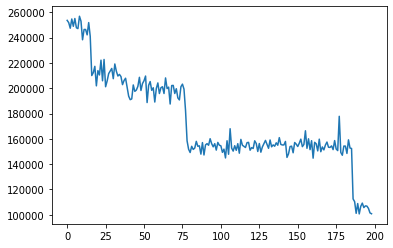

2020-06-20 00:59:58,431 : INFO : saving Word2Vec object under /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_industry.txt, separately None
2020-06-20 00:59:58,432 : INFO : not storing attribute vectors_norm
2020-06-20 00:59:58,432 : INFO : not storing attribute cum_table
2020-06-20 00:59:58,436 : INFO : saved /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_industry.txt
2020-06-20 00:59:58,437 : INFO : training on a 12733602800 raw words (1391234335 effective words) took 3618.5s, 384474 effective words/s


loss list:  [254044.9375, 507689.53125, 759546.25, 1006967.3125, 1261698.625, 1510645.625, 1765744.5, 2013526.75, 2260645.5, 2517545.25, 2770520.75, 3008829.25, 3255287.0, 3501711.75, 3743898.0, 3995782.5, 4236833.5, 4446858.5, 4659179.5, 4876483.5, 5078367.5, 5292286.0, 5502768.0, 5724945.5, 5930837.5, 6153575.5, 6354759.0, 6560460.5, 6772032.5, 6985662.0, 7201303.5, 7408843.5, 7628020.0, 7841439.5, 8051076.0, 8262009.0, 8471212.0, 8674058.0, 8880132.0, 9088037.0, 9289041.0, 9482798.0, 9673770.0, 9865295.0, 10067885.0, 10265409.0, 10463945.0, 10665437.0, 10874071.0, 11072299.0, 11276016.0, 11481981.0, 11691612.0, 11880299.0, 12082587.0, 12287864.0, 12486225.0, 12686600.0, 12875693.0, 13075509.0, 13279707.0, 13475518.0, 13675937.0, 13877123.0, 14072949.0, 14281089.0, 14480804.0, 14681672.0, 14869196.0, 15071324.0, 15273554.0, 15469388.0, 15669008.0, 15861387.0, 16052147.0, 16253338.0, 16456579.0, 16655854.0, 16838332.0, 16996748.0, 17148534.0, 17297730.0, 17451844.0, 17603488.0, 177562

In [18]:
model = Word2Vec(**params)

In [19]:
# ### Restore Model
# # #####################################
save_path = '/home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_%s.txt'%TARGET
model = Word2Vec.load(save_path)

2020-06-20 08:41:50,759 : INFO : loading Word2Vec object from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_industry.txt
2020-06-20 08:41:50,766 : INFO : loading wv recursively from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_industry.txt.wv.* with mmap=None
2020-06-20 08:41:50,766 : INFO : setting ignored attribute vectors_norm to None
2020-06-20 08:41:50,767 : INFO : loading vocabulary recursively from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_industry.txt.vocabulary.* with mmap=None
2020-06-20 08:41:50,768 : INFO : loading trainables recursively from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_industry.txt.trainables.* with mmap=None
2020-06-20 08:41:50,769 : INFO : setting ignored attribute cum_table to None
2020-06-20 08:41:50,769 : INFO : loaded /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_industry.txt


### 新方法

In [20]:
vocab = model.wv.index2word

In [21]:
vocab_dict = dict(zip(vocab, list(range(len(vocab)))))

In [22]:
f = open(TRAIN_DIR+'gensim_%s_dict.js'%TARGET,'w')
f.write(str(vocab_dict))
f.close()

In [23]:
wv_matrix = model.wv.vectors

In [24]:
np.save(TRAIN_DIR+'gensim_%s.npy'%TARGET, wv_matrix)

In [25]:
wv_matrix.shape

(332, 128)